In [1]:
import pandas

In [2]:
df = pandas.read_pickle('/home/gdholla1/projects/bias/data/behavior/behavior.pandas')

In [9]:
%load_ext rpy2.ipython

# Accuracy effects

# Difficulty

In [10]:
tmp = df.groupby(['subj_idx', 'difficulty'], as_index=False).mean()
tmp = tmp.pivot_table(index='subj_idx', columns='difficulty', values='correct')
tmp = np.arcsin(tmp)

In [11]:
sp.stats.ttest_rel(tmp['easy'], tmp['hard'])

Ttest_relResult(statistic=4.895719305769676, pvalue=0.00011640819832034805)

In [12]:
%%R -i tmp
library(BayesFactor)

ttestBF(tmp$easy - tmp$hard)

/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: coda

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: Matrix

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: ************
Welcome to BayesFactor 0.9.11-1. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************

  warnings.warn(x, RRuntimeWarning)


Bayes factor analysis
--------------
[1] Alt., r=0.707 : 244.7405 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS



## Congruency

In [52]:
tmp = df.groupby(['subj_idx', 'cue_validity'], as_index=False).mean()[['subj_idx', 'cue_validity', 'correct']]
# tmp = tmp.pivot_table(index='subj_idx', columns='cue_validity', values='correct')
tmp['correct'] = np.arcsin(tmp['correct'])

In [53]:
tmp = tmp[['subj_idx', 'cue_validity', 'correct']]

In [54]:
%%R -i tmp
library(BayesFactor)

tmp$subj_idx = as.factor(tmp$subj_idx)

print(summary(aov(correct ~ cue_validity + Error(subj_idx/(cue_validity)), data=tmp)))


bf = anovaBF(correct ~ cue_validity + subj_idx, data=tmp,  whichModels="top")

print(bf)
print(1/bf)


Error: subj_idx
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18  1.093 0.06074               

Error: subj_idx:cue_validity
             Df Sum Sq Mean Sq F value   Pr(>F)    
cue_validity  2 0.4081 0.20407   8.741 0.000805 ***
Residuals    36 0.8405 0.02335                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  |======================================================================| 100%
Bayes factor top-down analysis
--------------
When effect is omitted from subj_idx + cue_validity + subj_idx:cue_validity , BF is...
[1] Omit cue_validity:subj_idx : 1.919631   ±3.34%
[2] Omit cue_validity          : 0.01020012 ±1.86%
[3] Omit subj_idx              : 0.04468264 ±1.91%

Against denominator:
  correct ~ subj_idx + cue_validity + subj_idx:cue_validity 
---
Bayes factor type: BFlinearModel, JZS

                                                 denominator
numerator                                         subj_idx + cue_validity
  subj_idx + cue_

In [55]:
tmp = tmp.pivot_table(index='subj_idx', columns='cue_validity', values='correct')

sp.stats.ttest_rel(tmp['valid'], tmp['invalid'])

Ttest_relResult(statistic=3.063773132561884, pvalue=0.0066883793289771263)

In [56]:
%%R -i tmp
library(BayesFactor)

ttestBF(tmp$valid - tmp$invalid)

Bayes factor analysis
--------------
[1] Alt., r=0.707 : 7.280327 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS



# RT effects

## Difficulty

In [21]:
tmp = df.groupby(['subj_idx', 'difficulty'], as_index=False).mean()
tmp = tmp.pivot_table(index='subj_idx', columns='difficulty', values='rt')
tmp.head()

difficulty,easy,hard
subj_idx,,
1,837.507853,839.152632
2,800.413613,811.973262
3,807.415789,824.673684
4,825.801047,816.790576
5,747.064748,780.858108


In [22]:
print tmp.mean(), tmp.std()
sp.stats.ttest_rel(tmp['hard'], tmp['easy'])

difficulty
easy    821.688559
hard    850.073304
dtype: float64 difficulty
easy    88.46772
hard    76.39418
dtype: float64


Ttest_relResult(statistic=3.8853095823176003, pvalue=0.0010843399828263823)

In [24]:
%%R -i tmp
library(BayesFactor)

ttestBF(tmp$easy - tmp$hard)

Bayes factor analysis
--------------
[1] Alt., r=0.707 : 34.46702 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS



## Cue congruency

In [70]:
tmp = df.groupby(['subj_idx', 'cue_validity', 'correct'], as_index=False).mean()
tmp['correct'] =  tmp['correct'].map({0:'error', 1:'correct'})
tmp.head()

,subj_idx,cue_validity,correct,block,trial_NR,cue_delay,stim_delay,coherence,response,rt,onset_cue,onset_stim,subj_idx_exp
0,1,invalid,error,1.685714,63.885714,1092.857143,2050.000000,0.107429,1.342857,904.971429,573.064286,576.114286,12.0
1,1,invalid,correct,2.180328,70.245902,1229.508197,2180.327869,0.127213,1.409836,830.754098,630.442623,633.622951,12.0
2,1,neutral,error,2.014706,64.985294,1058.823529,2158.088235,0.115294,1.264706,867.292308,582.926471,586.084559,12.0
3,1,neutral,correct,1.991935,58.435484,1040.322581,2058.467742,0.122581,1.427419,816.838710,523.959677,527.018145,12.0
4,1,valid,error,2.024390,66.292683,1207.317073,2207.317073,0.111220,1.390244,823.609756,594.841463,598.048780,12.0


In [71]:
%%R -i tmp
library(BayesFactor)

tmp$subj_idx = as.factor(tmp$subj_idx)

print(summary(aov(rt ~ cue_validity*correct + Error(subj_idx/(cue_validity*correct)), data=tmp)))


bf = anovaBF(rt ~ cue_validity*correct + subj_idx, data = tmp,  whichRandom="subj_idx", whichModels="top")

print(bf)
print(1/bf)


Error: subj_idx
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18 668432   37135               

Error: subj_idx:cue_validity
             Df Sum Sq Mean Sq F value Pr(>F)
cue_validity  2    799   399.3   0.378  0.688
Residuals    36  38047  1056.9               

Error: subj_idx:correct
          Df Sum Sq Mean Sq F value  Pr(>F)   
correct    1  33332   33332    9.88 0.00562 **
Residuals 18  60726    3374                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: subj_idx:cue_validity:correct
                     Df Sum Sq Mean Sq F value  Pr(>F)   
cue_validity:correct  2  34993   17496   5.753 0.00679 **
Residuals            36 109483    3041                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  |======================================================================| 100%
Bayes factor top-down analysis
--------------
When effect is omitted from cue_validity + correct + cue_validity:correct + subj_idx , BF i

In [130]:
tmp = df.groupby(['subj_idx', 'cue_validity', 'correct'], as_index=False).mean()
tmp['correct'] =  tmp['correct'].map({0:'error', 1:'correct'})
tmp = tmp.pivot_table(index='subj_idx', columns=['cue_validity', 'correct'], values='rt')
tmp.head()

cue_validity     invalid                 neutral                   valid  \
correct          correct       error     correct       error     correct   
subj_idx                                                                   
1             830.754098  904.971429  816.838710  867.292308  829.509091   
2             825.220000  775.045455  816.839623  785.926829  763.627119   
3             800.228070  817.820513  819.241667  811.671429  801.081967   
4             928.590909  763.328767  839.583333  869.226190  761.216867   
5             767.280000  761.238095  741.345455  762.256410  809.962264   

cue_validity              
correct            error  
subj_idx                  
1             823.609756  
2             899.189189  
3             866.575758  
4             892.666667  
5             775.357143

In [131]:
print sp.stats.ttest_rel(tmp['valid', 'correct'], tmp['invalid', 'correct'])
print sp.stats.ttest_rel(tmp['valid', 'error'], tmp['invalid', 'error'])

Ttest_relResult(statistic=-2.9050774183321177, pvalue=0.0094412721889935956)
Ttest_relResult(statistic=1.9379004964901754, pvalue=0.068484726795863815)


In [132]:
%%R -i tmp
library(BayesFactor)
print(names(tmp))
print(ttestBF(tmp$X..valid....correct.. - tmp$X..invalid....correct..))
print(ttestBF(tmp$X..valid....error.. - tmp$X..invalid....error..))

[1] "X..invalid....correct.." "X..invalid....error.."  
[3] "X..neutral....correct.." "X..neutral....error.."  
[5] "X..valid....correct.."   "X..valid....error.."    
Bayes factor analysis
--------------
[1] Alt., r=0.707 : 5.456999 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS

Bayes factor analysis
--------------
[1] Alt., r=0.707 : 1.109742 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS



In [133]:
tmp = df.groupby(['subj_idx', 'cue_validity', 'difficulty', 'correct'], as_index=False).mean()
tmp['correct'] =  tmp['correct'].map({0:'error', 1:'correct'})


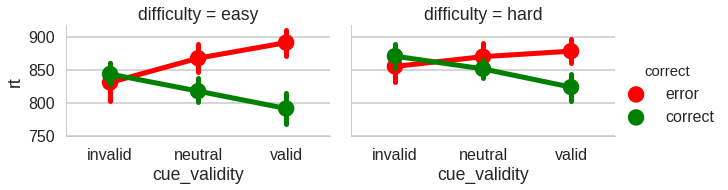

In [134]:
sns.set_context('poster')
sns.set_style('whitegrid')

fac = sns.factorplot('cue_validity', 'rt', 'correct', tmp, palette=['red', 'green'], col='difficulty', size=3, aspect=1.5, ci=67)

for ax in fac.axes.ravel():
    ax.set_yticks(np.arange(750, 950, 50))
    
plt.savefig('/home/gdholla1/projects/bias/reports/figures/figure1a.pdf')

In [135]:
tmp = df.groupby(['subj_idx', 'cue_validity', 'difficulty'], as_index=False).mean()

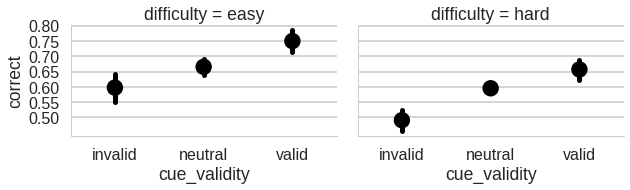

In [143]:
sns.set_context('poster')
sns.set_style('whitegrid')

fac = sns.factorplot('cue_validity', 'correct', data=tmp, palette=['black'], col='difficulty', size=3, aspect=1.5, ci=67)

for ax in fac.axes.ravel():
    ax.set_yticks(np.arange(.5, .85, .05))
    
plt.savefig('/home/gdholla1/projects/bias/reports/figures/figure1b.pdf')